# Deep Learning basic 과제
> 인공지능 스터디 첫 번째 과제에 오신 것을 환영합니다!

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> ReLU activation function (다중선택)
``` python
ReLU activation의 특징으로 틀린 것을 모두 고르면?

- (1) ReLU activation의 식은 max(0, x) 이다
- (2) 모든 점에서 미분이 가능하다
- (3) 특정 범위에서 neuron 이 죽게 된다
- (4) Sigmoid, tanh에 비해서 연산이 빠르다
- (5) Sigmoid, tanh에 비해서 Gradient가 출력층과 멀리 있는 Layer까지 전달되지 않는다
```

```python
😉
# TODO : 정답을 적어주세요

```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Objective function (단일선택)

``` python
흔히 classification task에서는 cross-entropy를 목적식으로 활용합니다. 
다른 loss 함수로 KL-divergence loss 가 있습니다. KL-divergence는 확률분포 사이의 차이를 비교할 때 사용하는 방법 중의 하나입니다. 
가령, 확률 분포 P를 모델링하여 확률 분포 Q를 얻었을 때, 모델링한 Q가 원래의 P와 얼마나 차이가 나는 지 확인할 때 사용합니다.

이 때, 주어진 확률분포 P, Q 에 대하여, cross-entropy H(P,Q) 수식을 entropy H(X) 와 KL-divergence KL (X|Y) 로 표현할 수 있는데요. 
수식이 아래와 같을 때, cross-entropy와 KL-divergence의 관계를 올바르게 표현한 것은 어떤 것일까요?
```
![](https://github.com/Pjunn/GDSC_mlstudy/blob/main/1%EC%A3%BC%EC%B0%A8/ex_image2.png?raw=true)
```python
- (1) H(P,Q) = H(P) + KL(P||Q)
- (2) H(P,Q) = H(Q) + KL(P||Q)
- (3) H(P,Q) = H(P) + KL(Q||P)
- (4) H(P,Q) = H(Q) + KL(Q||P)
```

```python
😉
# TODO : 정답을 적어주세요

```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Deep learning training (단일선택)

```python
다음 보기 중, 가장 올바르게 training 한 사례를 고르세요

- (1) cross-validation으로 최적의 parameter set을 찾고 test dataset을 포함해 training을 진행하였다
- (2) generalization 성능을 높이기 위하여, training error와 test error의 gap이 충분히 커진 이후 학습을 완료하였다
- (3) total-batch를 적용할 수 있는 사양이 충분함에도 mini-batch algorithm을 적용하였다
- (4) 같은 input units에 연결된 서로 다른 hidden units에 대해, 파라미터들의 초기값을 모두 동일하게 설정하였다

```


```python
😉
# TODO : 정답을 적어주세요

```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> Regularization (단일선택)

```python
다음 보기 중, regularization 기법으로 가장 부적절한 것은?

- Data Augmentation
- Early Stopping
- Gradient Vanishing
- Weight Decay
- Batch Normalization
```


```python
😉
# TODO : 정답을 적어주세요

```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> CNN 파라미터 갯수 (단답형)

```python
다음 그림에서, 파란색으로 칠해진 영역으로 표시된, convolutional layer의 파라미터 갯수를 구하세요. (단, bias 항은 없다고 가정합니다.)
```
![](https://github.com/Pjunn/GDSC_mlstudy/blob/main/1%EC%A3%BC%EC%B0%A8/ex_image3.png?raw=true)


```python
😉
# TODO : 정답을 적어주세요

```

#### ❓ <font color='red'><b>[ 퀴즈 ]</b></font> ResNet (단일선택)

```python
다음 문장의 빈 칸에 들어갈 가장 적절한 단어를 고르세요.

"ResNet improved the performance by proposing _____ connection."

- attention
- skip
- normalized
- full
```

```python
😉
# TODO : 정답을 적어주세요

```

## <font color='green'><b>[ 실습 ]</b></font>👨‍💻선형 회귀 구현하기

```python
아래 이미지에서 볼 수 있듯이, x_train과 y_train은 '선형' 관계를 가지고 있지만, y_train에 노이즈가 포함되어 있어서 점들이 구름처럼 퍼져 있습니다.
```

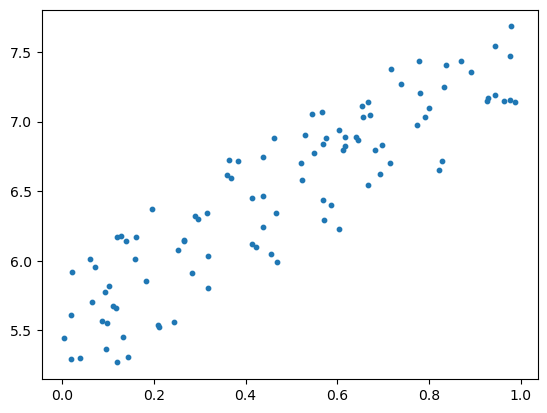

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# toy dataset 생성
np.random.seed(0)
x_train = np.random.rand(100, 1)
y_train = 5 + 2 * x_train + np.random.rand(100, 1)

plt.scatter(x_train, y_train, s=10)
plt.show()

``` python 
목표는 주어진 데이터를 가장 잘 설명하는 선형 함수를 찾는 것입니다. 
이러한 함수는 주어진 데이터와 예측값 간의 차이를 최소화해야 합니다. 
데이터와 예측값 사이의 관계는 일반적으로 y = Wx + b와 같은 선형 함수로 나타낼 수 있습니다.

데이터에 적합한 직선인 y = Wx + b를 찾기 위해서는 예측값과 데이터 간의 오차를 최소화해야 합니다. 
이 오차를 나타내는 지표로 '평균 제곱 오차'(mean squared error)를 사용합니다.

경사하강법은 손실 함수의 출력을 최소화하기 위한 W와 b를 찾기 위한 방법 중 하나입니다. 
경사하강법을 사용하여 W와 b를 반복적으로 업데이트하면 손실 함수의 값이 점차 감소함을 확인할 수 있습니다.

최종적으로, 경사하강법을 통해 얻어진 W와 b는 데이터를 가장 잘 설명하는 직선을 나타냅니다. 
이러한 직선은 W와 b에 의해 결정되며, 이를 시각화하여 데이터와의 적합성을 확인할 수 있습니다.
```


Epoch (         0/      5000) loss:  42.296340, W:   0.000000, b:  0.000000
Epoch (       500/      5000) loss:   0.087034, W:   2.294539, b:  5.376638
Epoch (      1000/      5000) loss:   0.079056, W:   2.119563, b:  5.465334
Epoch (      1500/      5000) loss:   0.076971, W:   2.030109, b:  5.510667
Epoch (      2000/      5000) loss:   0.076426, W:   1.984379, b:  5.533842
Epoch (      2500/      5000) loss:   0.076284, W:   1.961001, b:  5.545689
Epoch (      3000/      5000) loss:   0.076246, W:   1.949050, b:  5.551746
Epoch (      3500/      5000) loss:   0.076237, W:   1.942941, b:  5.554842
Epoch (      4000/      5000) loss:   0.076234, W:   1.939818, b:  5.556425
Epoch (      4500/      5000) loss:   0.076233, W:   1.938221, b:  5.557234
W:   1.937405
b:   5.557647


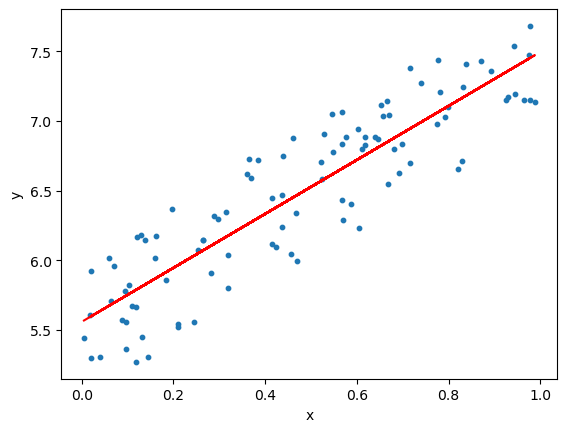

In [43]:
# 초기 Weight와 bias를 0.0으로 설정합니다.
Weight = 0.0
bias = 0.0

# 데이터 개수
n_data = len(x_train)

# 반복 횟수
epochs = 5000
# 학습률
learning_rate = 0.01

# 학습 과정을 반복합니다.
for i in range(epochs):
    # 예측값을 계산합니다.
    y_pred = x_train * Weight + bias
    
    # 평균 제곱 오차(Mean Squared Error) 손실을 계산합니다.
    MSE_loss = np.sum((y_pred - y_train) ** 2) / n_data
    
    # Weight에 대한 그래디언트(기울기)를 계산합니다.
    gradient_w = np.sum((Weight * x_train - y_train + bias) * 2 * x_train) / n_data ## TODO
    # bias에 대한 그래디언트(기울기)를 계산합니다.
    gradient_b = np.sum((Weight * x_train - y_train + bias) * 2) / n_data ## TODO

    # 매 500 에폭마다 현재 에폭 번호, 손실값, Weight, bias를 출력합니다.
    if i % 500 == 0:
        print('Epoch ({:10d}/{:10d}) loss: {:10f}, W: {:10f}, b:{:10f}'.format(i, epochs, MSE_loss, Weight, bias))

    # Weight와 bias를 경사하강법을 이용하여 업데이트합니다.
    Weight -= learning_rate * gradient_w
    bias -= learning_rate * gradient_b


print('W: {:10f}'.format(Weight))
print('b: {:10f}'.format(bias))

plt.scatter(x_train, y_train, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = x_train * Weight + bias
plt.plot(x_train, y_pred, color='r')
plt.show()

## <font color='green'><b>[ 코딩 ]</b></font>👨‍💻2D convolution 구현하기

```python
'과제 설명': 주어진 커널과 입력 데이터를 사용하여 컨볼루션 연산을 수행하는 Python 함수를 구현하세요. 또한, 주어진 입력과 커널에 대한 컨볼루션 연산을 수행한 결과를 출력하세요.

'과제 내용':
    1. 다음과 같은 입력 데이터와 커널을 사용하여 컨볼루션 연산을 수행하세요.
```

In [ ]:
# 입력 데이터 (4x4 크기의 2D 배열):
input_data = [[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]]

# 커널 (3x3 크기의 2D 배열):
kernel = [[1, 0, -1],
          [2, 0, -2],
          [1, 0, -1]]


```python
    2. 주어진 입력 데이터와 커널을 사용하여 컨볼루션 연산을 수행하는 Python 함수 convolution을 구현하세요.
       이 함수는 입력 데이터와 커널을 인자로 받아서 컨볼루션 연산을 수행하고 결과를 반환해야 합니다.
    3. 구현한 함수를 사용하여 컨볼루션 연산을 수행하고, 결과를 확인하세요.
```

In [ ]:
def convolution(input_data, kernel):
    
    # TODO : convolution 함수를 구현해주세요!
    
    # 결과 반환
    return output_data


# 아래 코드는 수정하실 필요가 없습니다!

input_data = [[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]]

kernel = [[1, 0, -1],
          [2, 0, -2],
          [1, 0, -1]]

output_data = convolution(input_data, kernel)

if output_data == [[-8, -8], [-8, -8]]:
    print("🎉🎉🎉 성공!!! 🎉🎉🎉")
else:
    print("다시 도전해봐요!")


## <font color='green'><b>[ 실습 ]</b></font>👨‍💻2D convolution in action

```python
convlution 연산을 한다는 것에는 어떤 의미가 있을까요? 
강의에서는 해당 convolution filter의 모양을 이미지에 찍는다고 했습니다. 
filter가 변함에 따라서 같은 이미지에 대해서 아웃풋이 어떻게 달라질지 확인해봅시다.

cv2.filter2D 함수는 OpenCV에서 제공하는 이미지 필터링 함수로, 이미지와 커널 간의 2D 합성곱을 수행합니다. 
```

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 파일 경로
image_path = 'ex_image1.jpeg'

# 이미지를 읽어옵니다.
image = cv2.imread(image_path)

# 이미지를 그레이스케일(흑백)로 변환합니다.
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



In [17]:
# 예제 이미지와 커널을 생성합니다.
image = np.array([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]], dtype=np.uint8)

kernel = np.array([[1, 0],
                   [0, -1]])
kernel = kernel[::-1,::-1]
# 각각의 필터를 이미지에 적용합니다.
filtered_image = cv2.filter2D(image, -1, kernel)
filtered_image

array([[0, 0, 0, 0],
       [3, 5, 5, 5],
       [3, 5, 5, 5]], dtype=uint8)

### Outline kernel

Outline 커널은 픽셀 값의 큰 차이를 강조하는 데 사용합니다. 이웃 픽셀과 비슷한 값을 갖는 픽셀은 새 이미지에서 검은색으로 표시되고, 이웃 픽셀과 차이가 큰 픽셀은 흰색으로 표시됩니다.

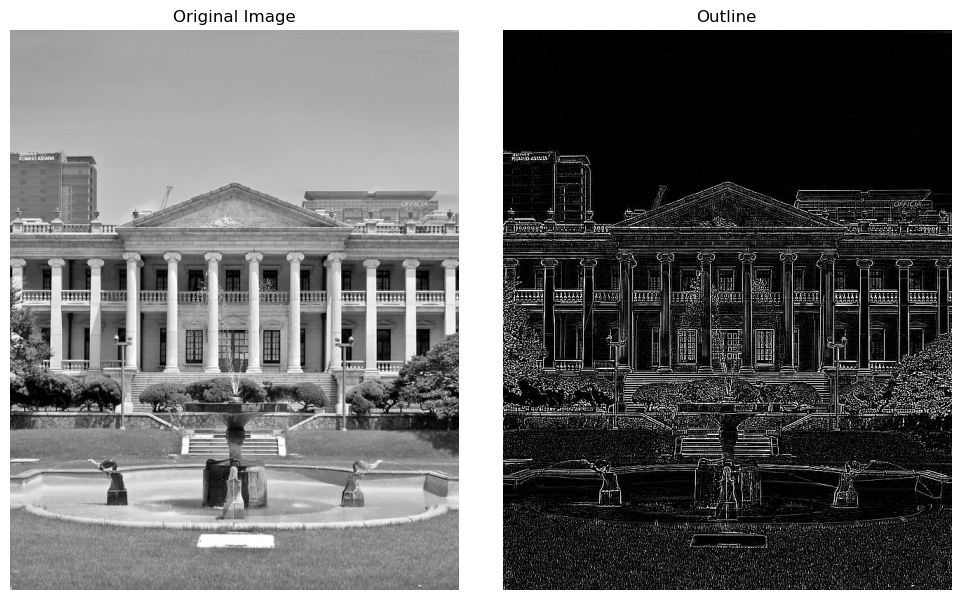

In [23]:
# 커널(필터)을 정의합니다.
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

# 필터를 이미지에 적용합니다.
filtered_image = cv2.filter2D(gray_image, -1, kernel)


# 결과 이미지를 Matplotlib을 사용하여 화면에 표시합니다.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Outline')
plt.axis('off')
plt.tight_layout()
plt.show()

### Blur kernel

Blur 커널은 인접한 픽셀의 차이를 줄이는 데 사용합니다.

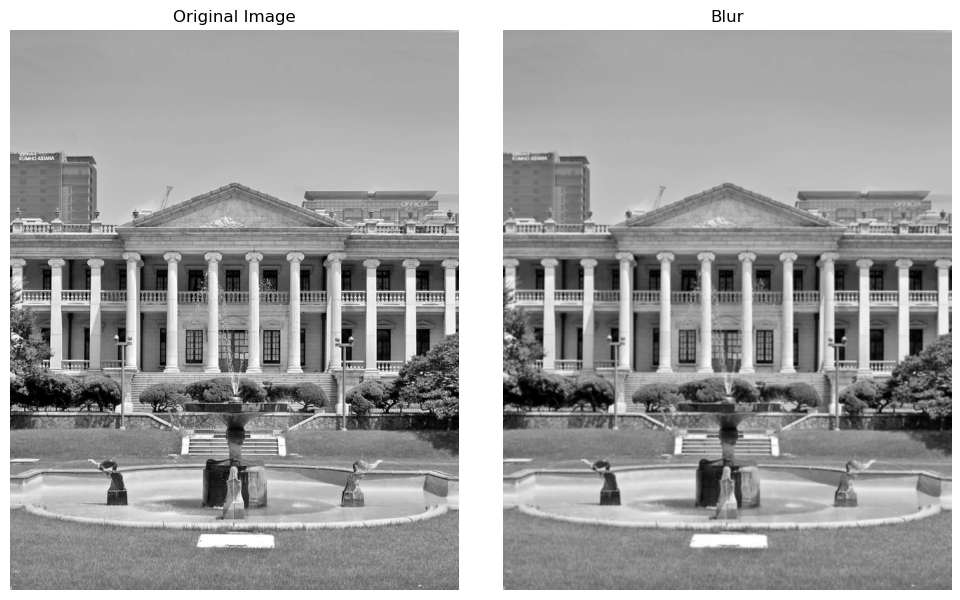

In [24]:
# 커널(필터)을 정의합니다.
kernel = np.array([[0.0625, 0.125, 0.0625],
                    [0.125, 0.25, 0.125],
                    [0.0625, 0.125, 0.0625]])

# 필터를 이미지에 적용합니다.
filtered_image = cv2.filter2D(gray_image, -1, kernel)


# 결과 이미지를 Matplotlib을 사용하여 화면에 표시합니다.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Blur')
plt.axis('off')
plt.tight_layout()
plt.show()

### Emboss kernel

Emboss 커널은 픽셀들의 차이를 강조함으로써 깊이에 대한 착시를 줄때 사용합니다.

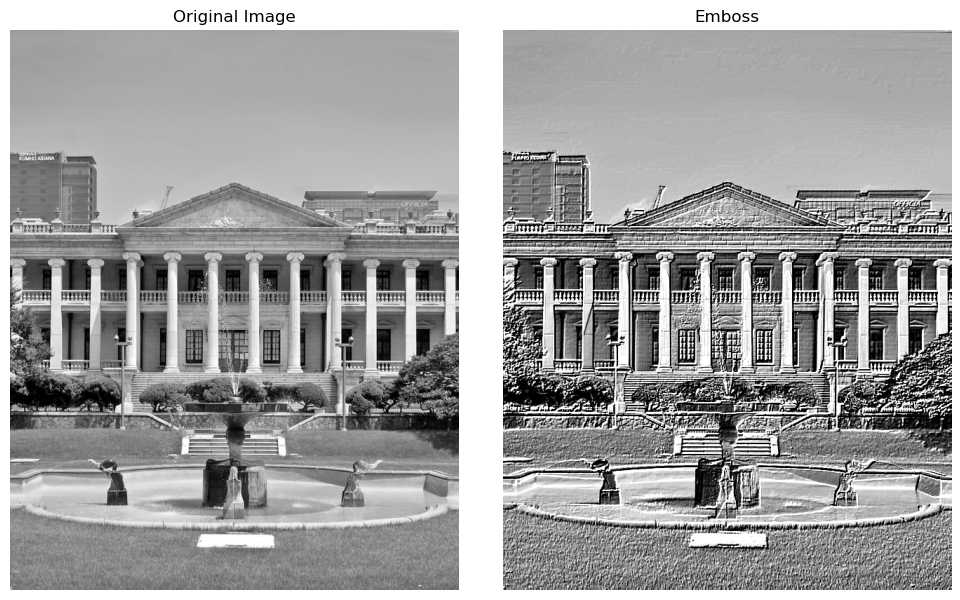

In [25]:
# 커널(필터)을 정의합니다.
kernel = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])

# 필터를 이미지에 적용합니다.
filtered_image = cv2.filter2D(gray_image, -1, kernel)


# 결과 이미지를 Matplotlib을 사용하여 화면에 표시합니다.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Emboss')
plt.axis('off')
plt.tight_layout()
plt.show()

### Sharpen kernel

Sharpen kernel은 인접한 픽셀 값의 차이를 강조하여 이미지를 더욱 선명하게 보이게 할때 사용합니다.

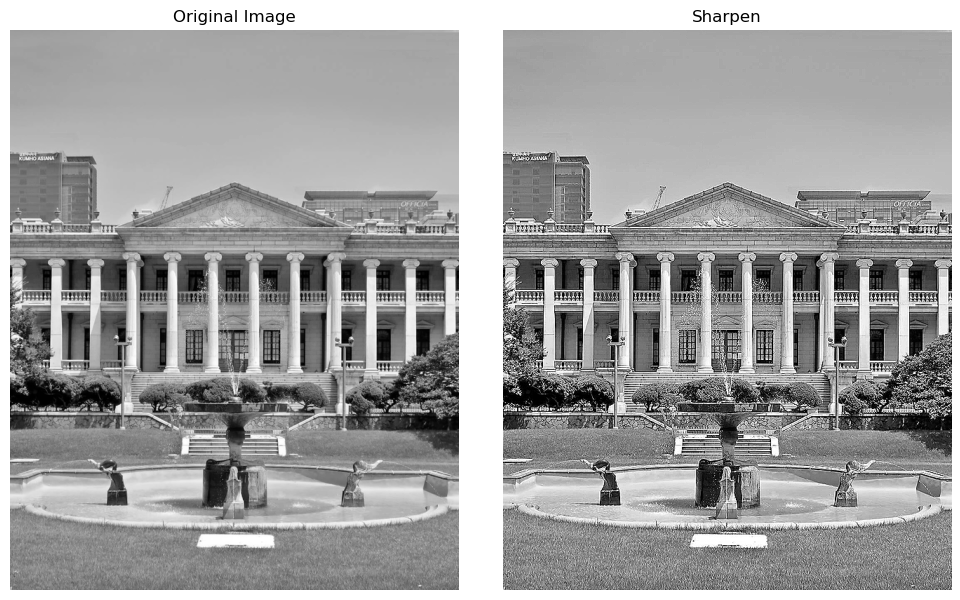

In [26]:
# 커널(필터)을 정의합니다.
kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])

# 필터를 이미지에 적용합니다.
filtered_image = cv2.filter2D(gray_image, -1, kernel)


# 결과 이미지를 Matplotlib을 사용하여 화면에 표시합니다.
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Sharpen')
plt.axis('off')
plt.tight_layout()
plt.show()

## <font color='green'><b>[ 코딩 ]</b></font>👨‍💻AlexNet의 총 parameter 개수

```python
합성곱 연산에서 필터(가충치, Weight)의 윈도우를 일정한 간격으로 이동해가며 계산합니다. 이후 편향(bias)를 더해주어 최종 출력을 완성합니다.
```
![conv](https://github.com/Pjunn/GDSC_mlstudy/blob/main/1%EC%A3%BC%EC%B0%A8/conv_bias.gif?raw=true)

```python
위 예시의 그림에서 파라미터 개수를 계산해본다면 필터: 3*3 = 9개, 편향: 1개 이고, 따라서 총 파라미터 개수는 10개입니다. 이때 편향의 개수는 필터의 개수와 일치합니다.

이제 AlexNet의 파라미터 개수를 계산해봅시다!
```
![an](https://github.com/Pjunn/GDSC_mlstudy/blob/main/1%EC%A3%BC%EC%B0%A8/alexnet.png?raw=true)
```python
첫번째 convolution Layer를 보면 필터의 크기가 11x11 이고 입력 채널수가 3, 출력 채널수가 48*2 = 96 입니다.
이때 파라미터 개수를 계산해보면 필터: 11 * 11 * 3 * 96 = 34848개 편향: 96개 로 총 34944개임을 알 수 있습니다.

두번쨰 Layer 부터 두개의 갈래로 나뉘어지는데요. 이때는 입력 채널수와 출력 채널수를 구할때 두 갈래로 나뉜 값을 하나로 더한다고 생각하여 계산하면 됩니다.
EX. 두번째 Layer의 입력 채널수는 48 + 48 = 96 이고 출력 채널수는 128 + 128 = 256 입니다!

이제 나머지 Layer에 대해서도 파라미터 개수를 구해주세요!
```


In [ ]:
def calculate_alexnet_parameters():
    # 각 레이어의 파라미터 개수 계산
    Conv1_parameters = 34944
    Conv2_parameters = # TODO : parameter 개수를 계산해주세요
    Conv3_parameters = # TODO : parameter 개수를 계산해주세요
    Conv4_parameters = # TODO : parameter 개수를 계산해주세요
    Conv5_parameters = # TODO : parameter 개수를 계산해주세요
    FC1_parameters = # TODO : parameter 개수를 계산해주세요
    FC2_parameters = # TODO : parameter 개수를 계산해주세요
    FC3_parameters = # TODO : parameter 개수를 계산해주세요

    total_parameters = Conv1_parameters + Conv2_parameters + Conv3_parameters + Conv4_parameters \
                        + Conv5_parameters + FC1_parameters + FC2_parameters + FC3_parameters

    return total_parameters



# 아래 코드는 수정하실 필요가 없습니다!

# 총 파라미터 개수 계산
total_parameters = calculate_alexnet_parameters()

if total_parameters == 62378344:
    print("🎉🎉🎉 성공!!! 🎉🎉🎉")
else:
    print("다시 도전해봐요!")